# Calculation of lower-limb dvdt between OSNAP East and GSR line



In [267]:
import numpy as np
import xarray as xr
import scipy as sc
import matplotlib.pylab as plt
from scipy import interpolate

# load data

In [227]:
path='/Users/smajumder38/Desktop/Research/data/'
ds1=xr.open_dataset(path+'vozocrtx_cglors.nc')
ds2=xr.open_dataset(path+'vomecrty_cglors.nc')
ds3=xr.open_dataset(path+'vosaline_cglors.nc')
ds4=xr.open_dataset(path+'votemper_cglors.nc')


## Estimating potential density

import seawater as sw
from seawater.library import T90conv



In [228]:
import seawater as sw
from seawater.library import T90conv


In [229]:
t = ds4.votemper
s = ds3.vosaline
t1 = T90conv(t)
t=t-273.14
time=ds4.time


In [230]:
def geo_area(lat,lon):
    
    for i_n in range(len(lon)-1):
        for i_m in range(len(lat)-1):
            
            lat1 = lat[i_m]; lat2 = lat[i_m+1]
            lon1 = lon[i_n]; lon2 = lon[i_n+1]
            d_x = (lon2-lon1)*(np.pi/180)*6370000*np.cos(0.5*(lat1+lat2)*np.pi/180)
            d_y = (lat2-lat1)*(np.pi/180)*6370000
            area[i_n,i_m]=d_x*d_y
            
            return area
    
  

In [231]:
lon=ds1.lon
lat=ds1.lat
lat1=lat[(lat>50) & (lat<65)] 
lon1=lon[(lon>-40) & (lon<0)] 

In [232]:
a=geo_area(lat1,lon1)

In [233]:
t1=t[:,:,(lat>50) & (lat<65),(lon>-40) & (lon<0)]
s1=s[:,:,(lat>50) & (lat<65),(lon>-40) & (lon<0)]

pden=np.empty(t1.shape)
pden[:] = np.nan


## calculate potential density and then depth of that isopycnal (overturning isopycnal)

In [258]:
z1=np.empty([s1.shape[0],s1.shape[2],s1.shape[3]])
for i in range(s1.shape[0]):
    for j in range(s1.shape[2]):
        for k in range(s1.shape[3]):
            pden=sw.pden(s1[i,:,j,k], t1[i,:,j,k], ds1.dep)-1000
            
            if pden[0]<27.55:
                f = interpolate.interp1d(pden,ds1.dep)
                z1[i,j,k] = f(27.55) 
         

## Time mean depth of overturning isopycnal

In [278]:
z2=np.mean(z1,axis=0)

Text(0.5, 1.0, 'Mean depth of 27.55kg/m^3 isopycnal')

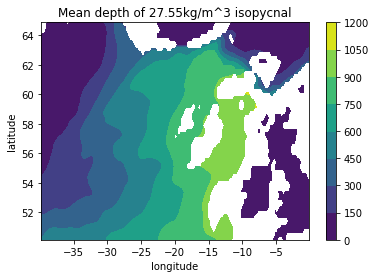

In [279]:
plt.contourf(lon1,lat1,z2)
plt.colorbar()
plt.title('')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Mean depth of 27.55kg/m^3 isopycnal')